<a href="https://colab.research.google.com/github/slancheros/Pixelate/blob/main/PixelateImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image

In [ ]:

def convert_to_pixel_art_with_palette(image_path, output_path, size=64, num_colors=12, original_size=None):
    img = Image.open(image_path)

    # Resize down to simulate pixelation
    img_small = img.resize((size, size), resample=Image.Resampling.BILINEAR)

    # Reduce color palette
    img_small = img_small.convert('P', palette=Image.ADAPTIVE, colors=num_colors)

    # Resize back up to original size or given size
    target_size = original_size if original_size else img.size
    img_pixel = img_small.resize(target_size, Image.Resampling.NEAREST)

    img_pixel.save(output_path)

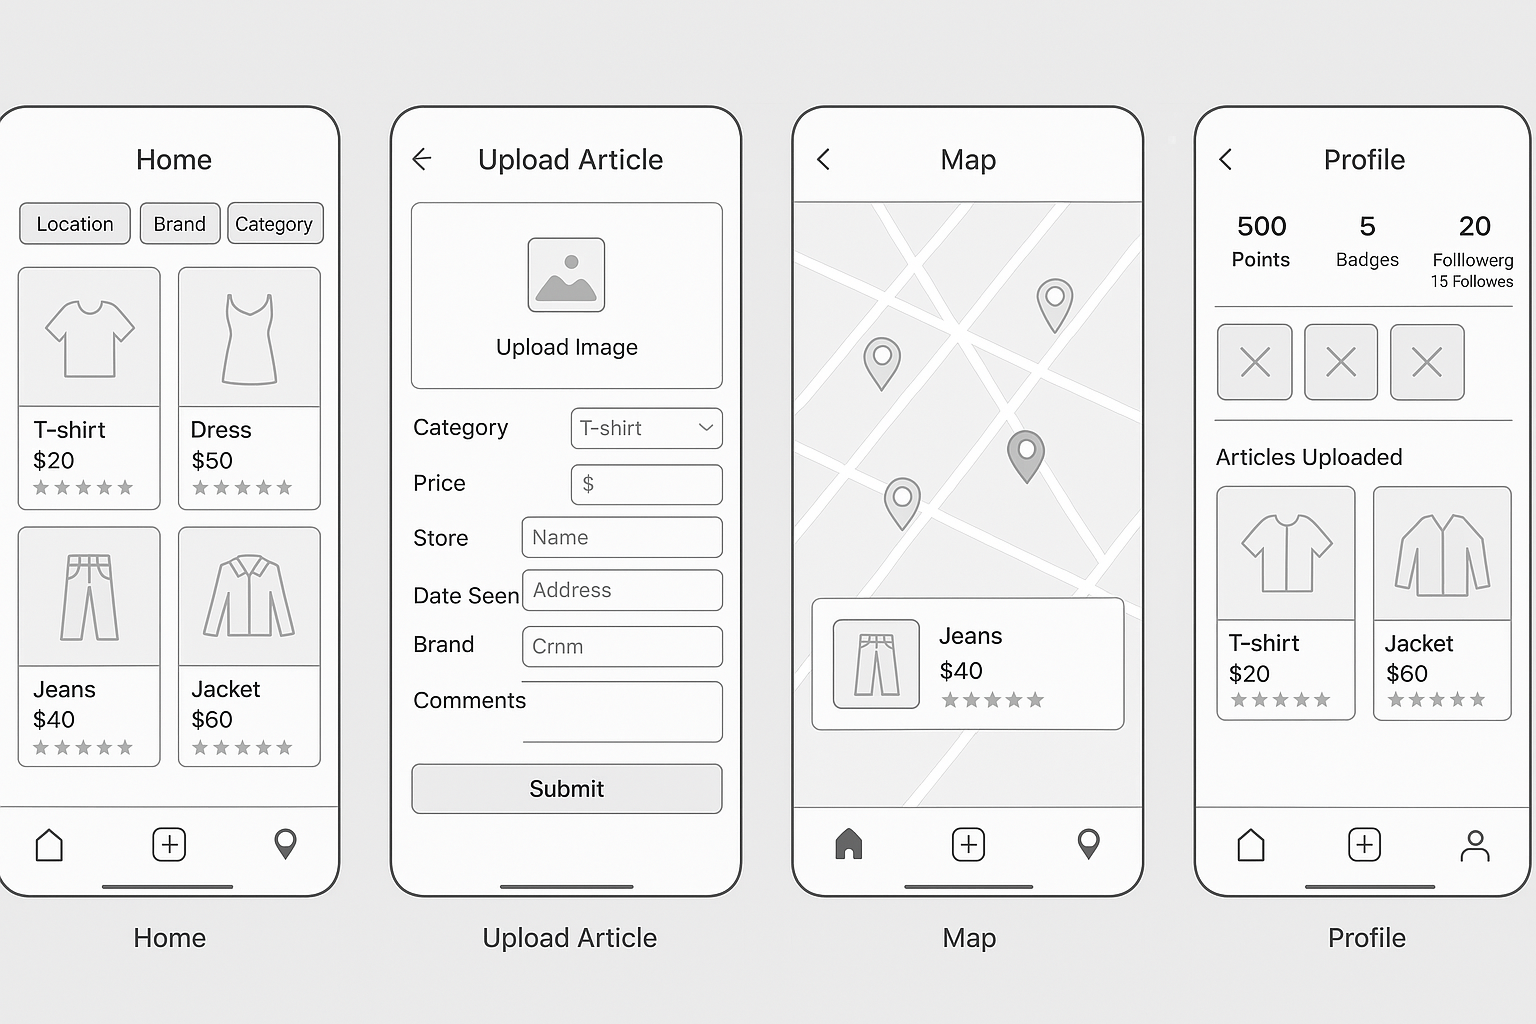

In [ ]:
display(Image.open('img.png'))

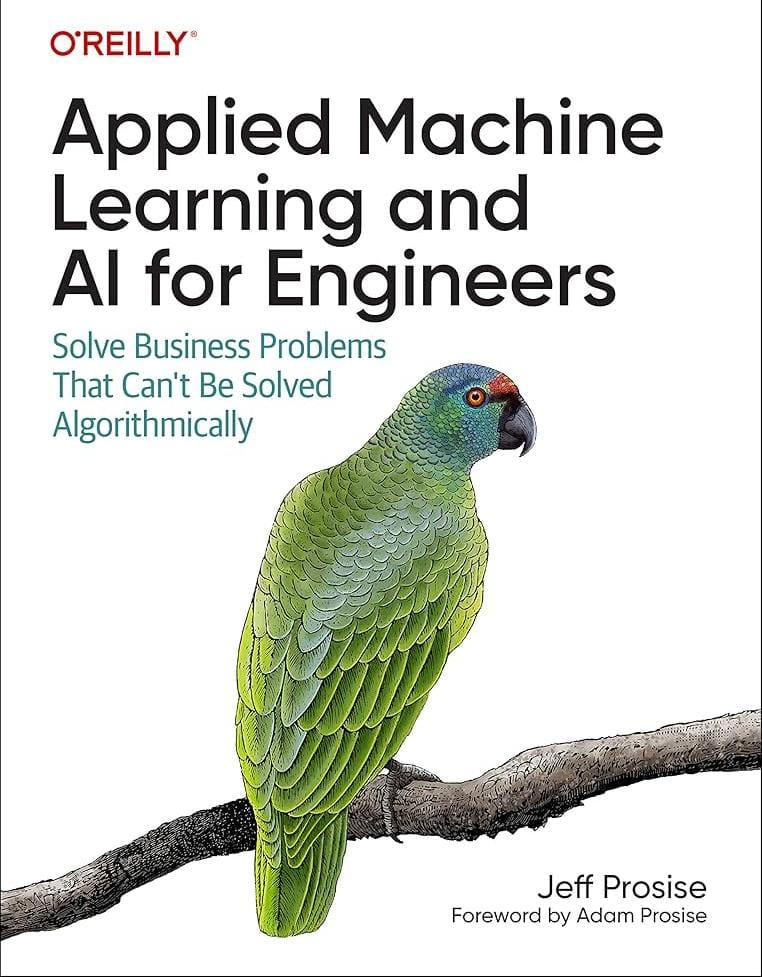

In [ ]:
display(Image.open('img2.jpeg'))

In [ ]:
pixelated = convert_to_pixel_art_with_palette('img2.jpeg',num_colors=30,output_path="pixelated_3.png",original_size=(500,1000))

In [ ]:
def convert_to_pixel_art(image_path, output_path, size=64, num_colors=16):
    from PIL import Image
    img = Image.open(image_path)

    # Resize down
    img_small = img.resize((size, size), resample=Image.Resampling.NEAREST)

    # Reduce colors
    img_small = img_small.convert('P', palette=Image.ADAPTIVE, colors=num_colors)

    # Resize up to original size for pixel look
    img_pixel = img_small.resize(img.size, Image.Resampling.NEAREST)

    img_pixel.save(output_path)

In [ ]:
pixel_art = convert_to_pixel_art('img2.jpeg',size= 100,num_colors= 10,output_path='pixel_art.png')

In [ ]:
def apply_custom_palette(image_path, output_path, palette):
    """
    Reduces an image to a custom palette using nearest color matching.
    """
    image = Image.open(image_path).convert("RGB")
    img_data = np.array(image)

    # Reshape to list of pixels
    pixels = img_data.reshape(-1, 3)

    # Define a simple function to get closest palette color
    def closest_color(pixel, palette):
        return min(palette, key=lambda c: np.linalg.norm(np.array(pixel) - np.array(c)))

    # Apply palette mapping
    reduced_pixels = [closest_color(pixel, palette) for pixel in pixels]
    reduced_img_data = np.array(reduced_pixels, dtype=np.uint8).reshape(img_data.shape)

    # Create and save new image
    new_img = Image.fromarray(reduced_img_data, 'RGB')
    new_img.save(output_path)

# Game Boy Palette (green shades)
gameboy_palette = [
    (15, 56, 15),
    (48, 98, 48),
    (139, 172, 15),
    (155, 188, 15)
]


In [ ]:
import numpy as np

In [ ]:
convert_to_pixel_art('cup.jpg',size=30, num_colors=4,output_path='pixel_art_cup.png')

In [ ]:
from PIL import Image, ImageDraw, ImageFont

In [ ]:
def pixelate_with_numbered_grid(image_path, output_path, pixel_size=40):
    # Open image
    image = Image.open(image_path)
    width, height = image.size

    # Pixelate the image
    image_small = image.resize(
        (width // pixel_size, height // pixel_size),
        resample=Image.Resampling.BILINEAR
    )
    pixelated_image = image_small.resize(image.size, Image.Resampling.NEAREST)

    # Prepare to draw
    draw = ImageDraw.Draw(pixelated_image)
    font_size = max(10, pixel_size // 3)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except:
        font = ImageFont.load_default()

    # Draw grid lines and numbers
    for x in range(0, width, pixel_size):
        draw.line((x, 0, x, height), fill="gray", width=1)
        if x // pixel_size < width // pixel_size:
            draw.text((x + 2, 2), str(x // pixel_size), fill="black", font=font)

    for y in range(0, height, pixel_size):
        draw.line((0, y, width, y), fill="gray", width=1)
        if y // pixel_size < height // pixel_size:
            draw.text((2, y + 2), str(y // pixel_size), fill="black", font=font)

    # Save output
    pixelated_image.save(output_path)

    return width // pixel_size, height // pixel_size


In [ ]:
pixelate_with_numbered_grid('cup.jpg',output_path='pixel_art_cup.png')

(16, 37)

In [ ]:
def full_pixel_art_process(
    image_path,
    output_path,
    grid_size=32,
    pixel_size=32,
    num_colors=8,
    add_grid=True
):
    # Open original image
    image = Image.open(image_path)

    # Resize down to grid resolution
    image_small = image.resize((grid_size, grid_size), resample=Image.Resampling.BILINEAR)

    # Reduce colors
    image_small = image_small.convert('P', palette=Image.ADAPTIVE, colors=num_colors)

    # Resize back up using NEAREST to preserve hard edges
    pixelated_image = image_small.resize(
        (grid_size * pixel_size, grid_size * pixel_size),
        resample=Image.Resampling.NEAREST
    )

    if add_grid:
        draw = ImageDraw.Draw(pixelated_image)
        font_size = max(10, pixel_size // 3)

        try:
            font = ImageFont.truetype("arial.ttf", font_size)
        except:
            font = ImageFont.load_default()

        # Draw grid lines
        for x in range(0, grid_size * pixel_size, pixel_size):
            draw.line((x, 0, x, grid_size * pixel_size), fill="gray", width=1)
            draw.text((x + 2, 2), str(x // pixel_size), fill="black", font=font)

        for y in range(0, grid_size * pixel_size, pixel_size):
            draw.line((0, y, grid_size * pixel_size, y), fill="gray", width=1)
            draw.text((2, y + 2), str(y // pixel_size), fill="black", font=font)

    pixelated_image.save(output_path)
    return output_path, grid_size, pixel_size, num_colors

# Apply to original image with user-control parameters
original_image_path = "cup.jpg"
final_output_path = "fullprocess_cup.png"

# Custom settings
grid_size = 32       # how many blocks per side
pixel_size = 32      # how big each block is
num_colors = 6       # how many unique colors to use

# Run the process
full_pixel_art_process(
    image_path=original_image_path,
    output_path=final_output_path,
    grid_size=grid_size,
    pixel_size=pixel_size,
    num_colors=num_colors,
    add_grid=True
)

('fullprocess_cup.png', 32, 32, 6)

In [ ]:
full_pixel_art_process('cup.jpg',grid_size=64,pixel_size=16,num_colors=8,output_path='pixel_art_cup.png')

('pixel_art_cup.png', 64, 16, 8)

In [ ]:
# Updated function allowing independent control of grid width and height
def full_pixel_art_process_custom_grid(
    image_path,
    output_path,
    grid_width=32,
    grid_height=32,
    pixel_size=32,
    num_colors=8,
    add_grid=True
):
    # Open original image
    image = Image.open(image_path)

    # Resize down to grid resolution
    image_small = image.resize((grid_width, grid_height), resample=Image.Resampling.BILINEAR)

    # Reduce colors
    image_small = image_small.convert('P', palette=Image.MESH, colors=num_colors)

    # Resize back up using NEAREST to preserve hard edges
    pixelated_image = image_small.resize(
        (grid_width * pixel_size, grid_height * pixel_size),
        resample=Image.Resampling.NEAREST
    )

    if add_grid:
        draw = ImageDraw.Draw(pixelated_image)
        font_size = max(10, pixel_size // 3)

        try:
            font = ImageFont.truetype("arial.ttf", font_size)
        except:
            font = ImageFont.load_default()

        # Draw grid lines
        for x in range(0, grid_width * pixel_size, pixel_size):
            draw.line((x, 0, x, grid_height * pixel_size), fill="gray", width=3)
            draw.text((x + 2, 2), str(x // pixel_size), fill="black", font=font)

        for y in range(0, grid_height * pixel_size, pixel_size):
            draw.line((0, y, grid_width * pixel_size, y), fill="gray", width=1)
            draw.text((2, y + 2), str(y // pixel_size), fill="black", font=font)

    pixelated_image.save(output_path)
    return output_path, grid_width, grid_height, pixel_size, num_colors

# Apply with independent grid width and height
custom_output_path = "full_cup.png"
grid_w = 24  # blocks horizontally
grid_h = 36  # blocks vertically
px_size = 32
n_colors = 6

# Execute the function
full_pixel_art_process_custom_grid(
    image_path=original_image_path,
    output_path=custom_output_path,
    grid_width=grid_w,
    grid_height=grid_h,
    pixel_size=px_size,
    num_colors=n_colors,
    add_grid=True
)

custom_output_path


'full_cup.png'

In [ ]:
%pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
def process_image(image, grid_width, grid_height, pixel_size, num_colors):
    output_path = "output.png"
    full_pixel_art_process_custom_grid(
        image_path=image,
        output_path=output_path,
        grid_width=grid_width,
        grid_height=grid_height,
        pixel_size=pixel_size,
        num_colors=num_colors,
        add_grid=True
    )
    return output_path

demo = gr.Interface(
    fn=process_image,
    inputs=[
        gr.Image(type="filepath", label="Upload Image"),
        gr.Slider(8, 100, value=32, step=1, label="Grid Width"),
        gr.Slider(8, 100, value=32, step=1, label="Grid Height"),
        gr.Slider(8, 64, value=32, step=1, label="Pixel Size"),
        gr.Slider(2, 32, value=8, step=1, label="Number of Colors")
    ],
    outputs=gr.Image(type="filepath", label="Pixel Art Output"),
    title="🎨 Pixel Art Generator",
    description="Upload an image and customize your pixelated grid!"
)
demo.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4a38ff630e08cdb6b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
